In [1]:
import os
import sys

from matplotlib import pyplot as plt
import numpy as np
import suite2p

from sess_util import sess_plot_util

In [2]:
main_path = '/media/colleen/LaCie2/CredAssign/data/prod_h5s/dend/prod/mouse_412933/ophys_session_763949859/ophys_experiment_764530972/processed'
h5_name = 'concat_31Hz_0.h5'
h5_name = 'test.h5'

# main_path = '/home/colleen/Documents/calcium-analysis/EXTRACT-master-cjg'
# h5_name = 'data_snippets.h5'

In [3]:
h5_path = os.path.join(main_path, h5_name)

# set your options for running
ops = suite2p.default_ops() # populates ops with the default options

# provide an h5 path in 'h5py' or a tiff path in 'data_path'
# db overwrites any ops (allows for experiment specific settings)
db = {
      'h5py': h5_path, # a single h5 file path
      'h5py_key': 'data',
      'data_path': [],
      'subfolders': [],
      'look_one_level_down': False, # whether to look in ALL subfolders when searching for tiffs
      'fast_disk': '/home/colleen/Download', # string which specifies where the binary file will be stored (should be an SSD)
    }

# additional parameters:
db['do_registration'] = 0
db['sparse_mode'] = True
db['connected'] = False

# run one experiment
opsEnd=suite2p.run_s2p(ops=ops,db=db)

{'h5py': '/media/colleen/LaCie2/CredAssign/data/prod_h5s/dend/prod/mouse_412933/ophys_session_763949859/ophys_experiment_764530972/processed/test.h5', 'h5py_key': 'data', 'data_path': [], 'subfolders': [], 'look_one_level_down': False, 'fast_disk': '/home/colleen/Download', 'do_registration': 0, 'sparse_mode': True, 'connected': False}
FOUND OPS IN /media/colleen/LaCie2/CredAssign/data/prod_h5s/dend/prod/mouse_412933/ophys_session_763949859/ophys_experiment_764530972/processed/suite2p/plane0
NOTE: not registered / registration forced with ops['do_registration']>1
no offsets to delete
FOUND BINARIES: /home/colleen/Download/suite2p/plane0/data.bin
SKIPPING REGISTRATION FOR ALL PLANES...
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- ROI DETECTION AND EXTRACTION
Binning movie in chunks of length 10
Binned movie [500,512,512], 4.09 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=217.70
1000 ROIs, score=11.22
2000 ROIs, score=7

/home/colleen/anaconda3/envs/aibs3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------- Total 218.19 sec.
----------- SPIKE DECONVOLUTION
----------- Total 2.30 sec.
Plane 0 processed in 220.54 sec (can open in GUI).
total = 220.66 sec.
TOTAL RUNTIME 220.72 sec


In [4]:
stat_file = os.path.join(main_path, 'suite2p/plane0/stat.npy')
stat = np.load(stat_file, allow_pickle=True)

In [5]:
cell_pix, cell_masks = suite2p.extraction.masks.create_cell_masks(
    stat, opsEnd[0]['Ly'], opsEnd[0]['Lx'], allow_overlap=True)

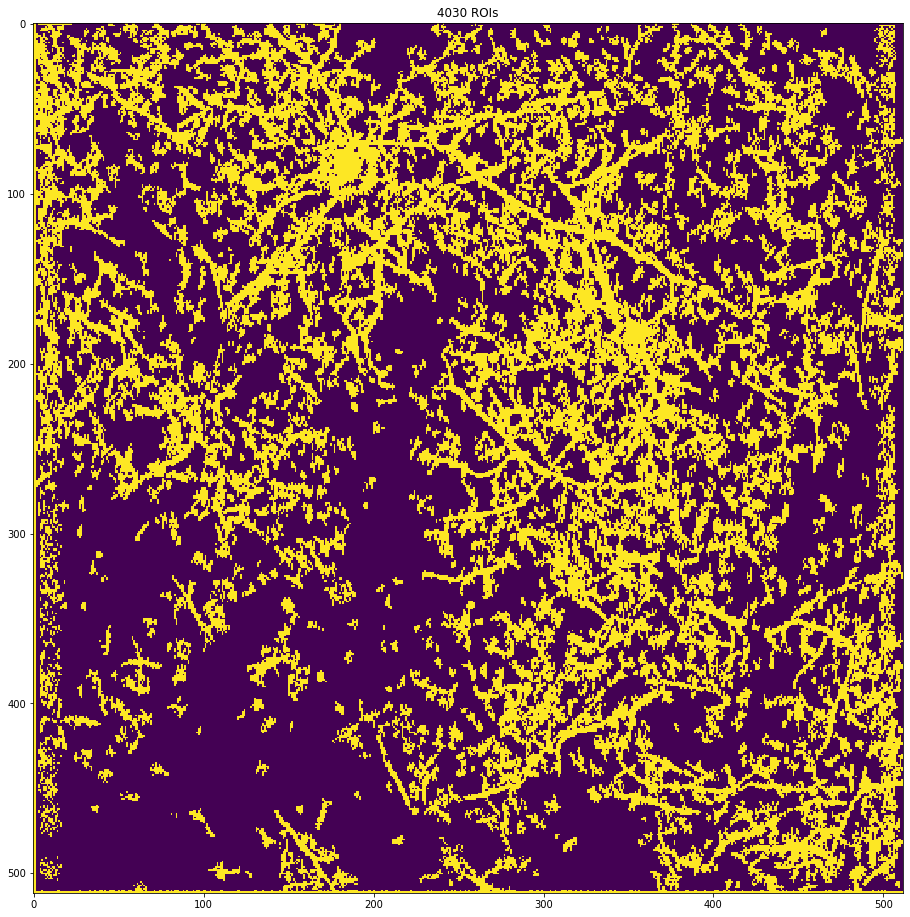

In [6]:
fig, ax = plt.subplots(1, figsize=[16, 16])
ax.imshow(cell_pix.T)
_ = ax.set_title(f'{len(cell_masks)} ROIs')

In [7]:
masks = np.zeros([len(cell_masks), np.product(cell_pix.shape)])
for o in range(len(output)):
    for pix, wei in zip(*cell_masks[o]):
        masks[o, pix] = wei
masks = np.transpose(masks.reshape([len(cell_masks), *cell_pix.shape]), [0, 2, 1])

largest_mask = np.sum(masks.astype(bool), axis=(1, 2)) < 50

NameError: name 'output' is not defined

In [ ]:
fig, ax = plt.subplots(1, figsize=[16, 16])
_ = sess_plot_util.plot_ROIs(ax, masks=masks, valid_mask=largest_mask)

In [ ]:
ops